In [62]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import pearsonr, spearmanr, kendalltau, norm
import seaborn as sns

In [63]:
df = pd.read_csv('heart.csv', sep=',')
print(df.head(20))
# print(df.info())
# print(df.shape)
# print(df.stroke.unique())

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    52    1   0       125   212    0        1      168      0      1.0   
1    53    1   0       140   203    1        0      155      1      3.1   
2    70    1   0       145   174    0        1      125      1      2.6   
3    61    1   0       148   203    0        1      161      0      0.0   
4    62    0   0       138   294    1        1      106      0      1.9   
5    58    0   0       100   248    0        0      122      0      1.0   
6    58    1   0       114   318    0        2      140      0      4.4   
7    55    1   0       160   289    0        0      145      1      0.8   
8    46    1   0       120   249    0        0      144      0      0.8   
9    54    1   0       122   286    0        0      116      1      3.2   
10   71    0   0       112   149    0        1      125      0      1.6   
11   43    0   0       132   341    1        0      136      1      3.0   
12   34    0   1       11

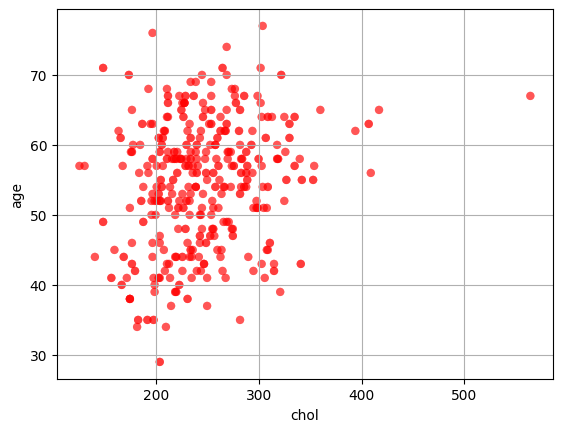


Математическое ожидание: 
246

Средневзвешенное значение: 
246.0

Медиана:  240
Медиана меньшее среднее значение:  240
Медиана большее среднее значение:  240

Мода: 
Значение моды:  204

Минимум:  126
Максимум:  564


In [64]:
# Центральные метрики

serum = df['chol']
age = df['age']
fig, ax = plt.subplots()
ax.scatter(serum, age, c='red', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('chol')
plt.ylabel('age')
plt.show()

print("\nМатематическое ожидание: ")
print(st.mean(df['chol']))

print("\nСредневзвешенное значение: ")
print(np.average(df['chol']))

print("\nМедиана: ", st.median(df['chol']))
print("Медиана меньшее среднее значение: ", st.median_low(df['chol']))
print("Медиана большее среднее значение: ", st.median_high(df['chol']))

print("\nМода: ")
print('Значение моды: ', st.mode(df['chol']))

print("\nМинимум: ", np.min(df['chol']))
print("Максимум: ", np.max(df['chol']))

In [65]:
print("\nМатематическое ожидание: ")
print(st.mean(df['restecg']))

print("\nСредневзвешенное значение: ")
print(np.average(df['restecg']))

print("\nМедиана: ", st.median(df['restecg']))
print("Медиана меньшее среднее значение: ", st.median_low(df['restecg']))
print("Медиана большее среднее значение: ", st.median_high(df['restecg']))

print("\nМода: ")
print('Значение моды: ', st.mode(df['restecg']))

print("\nМинимум: ", np.min(df['restecg']))
print("Максимум: ", np.max(df['restecg']))


Математическое ожидание: 
0.5297560975609756

Средневзвешенное значение: 
0.5297560975609756

Медиана:  1
Медиана меньшее среднее значение:  1
Медиана большее среднее значение:  1

Мода: 
Значение моды:  1

Минимум:  0
Максимум:  2


In [66]:
print("\nМатематическое ожидание: ")
print(st.mean(df['age']))

print("\nСредневзвешенное значение: ")
print(np.average(df['age']))

print("\nМедиана: ", st.median(df['age']))
print("Медиана меньшее среднее значение: ", st.median_low(df['age']))
print("Медиана большее среднее значение: ", st.median_high(df['age']))

print("\nМода: ")
print('Значение моды: ', st.mode(df['age']))

print("\nМинимум: ", np.min(df['age']))
print("Максимум: ", np.max(df['age']))


Математическое ожидание: 
54.43414634146342

Средневзвешенное значение: 
54.43414634146342

Медиана:  56
Медиана меньшее среднее значение:  56
Медиана большее среднее значение:  56

Мода: 
Значение моды:  58

Минимум:  29
Максимум:  77


In [67]:
print("\nМатематическое ожидание: ")
print(np.nanmean(df['ejection fraction']))

print("\nСредневзвешенное значение: ")
print(np.average(df['ejection fraction']))

print("\nМедиана: ", st.median(df['ejection fraction']))
print("Медиана меньшее среднее значение: ", st.median_low(df['ejection fraction']))
print("Медиана большее среднее значение: ", st.median_high(df['ejection fraction']))

print("\nМода: ")
print('Значение моды: ', st.mode(df['ejection fraction']))

print("\nМинимум: ", np.min(df['ejection fraction']))
print("Максимум: ", np.max(df['ejection fraction']))


Математическое ожидание: 


KeyError: 'ejection fraction'


Дисперсия: 
528.7469706127305
528.7469706127305

Стандартное отклонение: 
22.994498703227485

Квантиль: 
108.0
182.0
[132. 152. 166.]

Размах: 
131


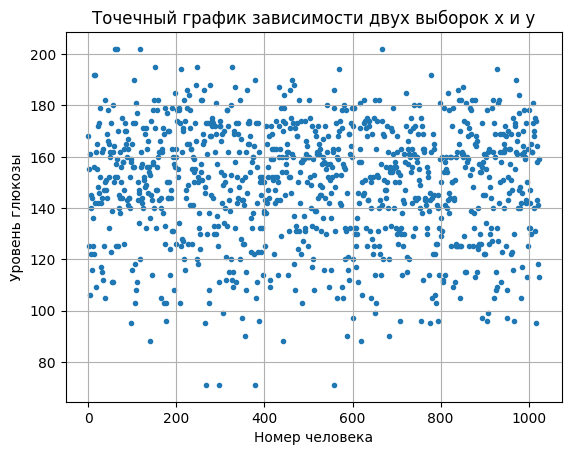

In [ ]:
# Метрики оценки вариативности данных

print("\nДисперсия: ")
print(st.pvariance(df['thalach']))
print(st.pvariance(df['thalach'], mu=st.mean(df['thalach'])))

print("\nСтандартное отклонение: ")
print(st.pstdev(df['thalach']))

print("\nКвантиль: ")
print(np.percentile(df['thalach'], 5))
print(np.percentile(df['thalach'], 95))
print(np.percentile(df['thalach'], [25, 50, 75]))

print("\nРазмах: ")
duration_range = max(df['thalach']) - min(df['thalach'])
print(duration_range)
x = [i for i in range(0, len(df['thalach']))]
y = df.loc[:, 'thalach']
plt.xlabel('Номер человека')
plt.ylabel('Уровень глюкозы')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
plt.show()


Дисперсия: 
82.22615110053539
82.22615110053539

Стандартное отклонение: 
9.067863645894517

Квантиль: 
39.0
68.0
[48. 56. 61.]

Размах: 
48


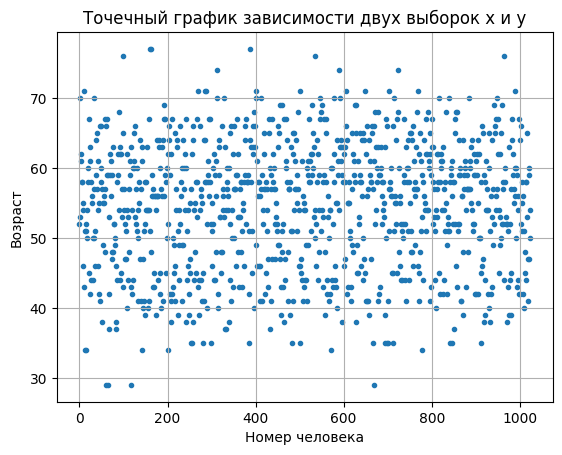

In [ ]:
print("\nДисперсия: ")
print(st.pvariance(df['age']))
print(st.pvariance(df['age'], mu=st.mean(df['age'])))

print("\nСтандартное отклонение: ")
print(st.pstdev(df['age']))

print("\nКвантиль: ")
print(np.percentile(df['age'], 5))
print(np.percentile(df['age'], 95))
print(np.percentile(df['age'], [25, 50, 75]))

print("\nРазмах: ")
duration_range = max(df['age']) - min(df['age'])
print(duration_range)
x = [i for i in range(0, len(df['age']))]
y = df.loc[:, 'age']
plt.xlabel('Номер человека')
plt.ylabel('Возраст')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
plt.show()


Корреляция: 


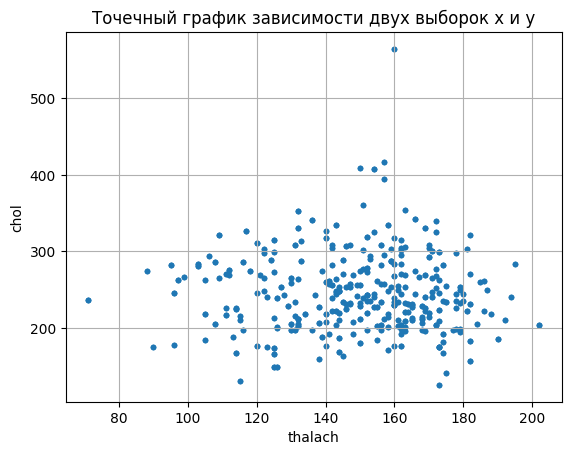


Корреляция Пирсона: 
-0.39022707503159293 1.2738266772096955e-38

Корреляция Спирмена: 
-0.3827238735289346 4.246376766354743e-37

Корреляция Тау Кендалла: 
-0.26967809713995067 1.4673498447591593e-36

Выбросы: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


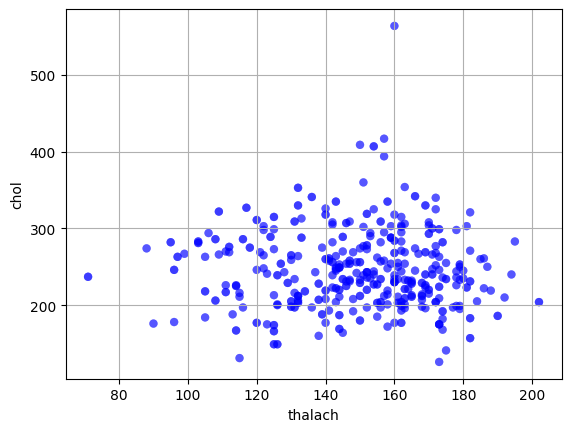

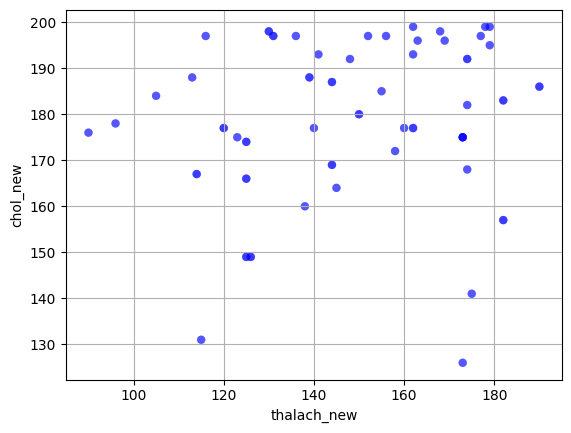

In [ ]:
# Метрики оценки корреляции или взаимозависимости

print("\nКорреляция: ")
thalach = df['thalach']
chol = df['chol']
plt.title('Точечный график зависимости двух выборок x и y')
plt.scatter(thalach, chol, marker='.')
plt.grid(True)
plt.xlabel('thalach')
plt.ylabel('chol')
plt.show()

print("\nКорреляция Пирсона: ")
corr, p_value = pearsonr(df['thalach'], df['age'])
print(corr, p_value)

print("\nКорреляция Спирмена: ")
corr, p_value = spearmanr(df['thalach'], df['age'])
print(corr, p_value)

print("\nКорреляция Тау Кендалла: ")
corr, p_value = kendalltau(df['thalach'], df['age'])
print(corr, p_value)

print("\nВыбросы: ")
print(df.isnull().sum())
thalach = df['thalach']
chol = df['chol']
fig, ax = plt.subplots()
ax.scatter(thalach, chol, c='blue', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('thalach')
plt.ylabel('chol')
plt.show()

thalach_new = thalach[chol < 200]
chol_new = chol[chol < 200]
fig, ax = plt.subplots()
ax.scatter(thalach_new, chol_new, c='blue', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('thalach_new')
plt.ylabel('chol_new')
plt.show()


Матрица корреляций: 


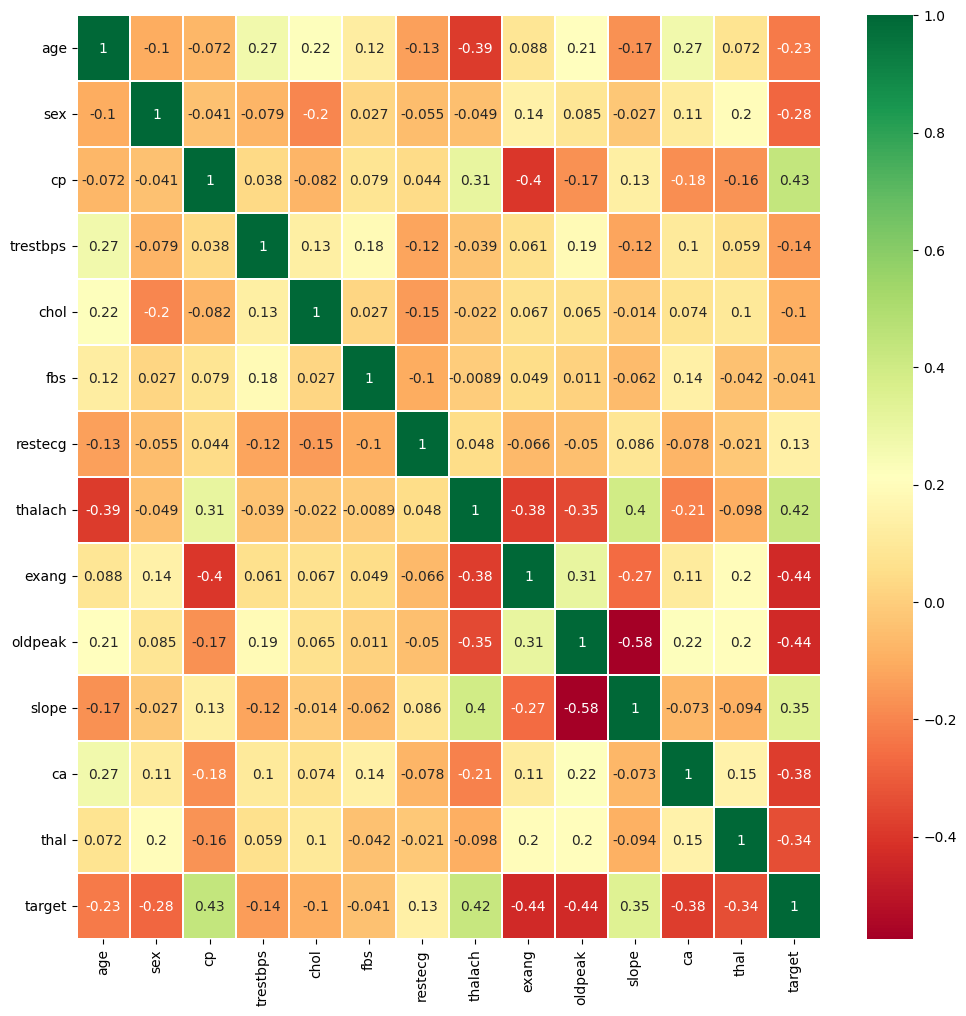

In [ ]:


print("\nМатрица корреляций: ")
data = df.iloc[:, :]
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()